In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

In [2]:
import array
import OpenEXR
import Imath
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_flow_vis(flow):    
    hsv = np.zeros((flow.shape[0], flow.shape[1], 3), dtype=np.uint8)
    hsv[..., 1] = 255

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    
    return rgb

def exr2flow_other(exr, w,h):
    file = OpenEXR.InputFile(exr)

    # Compute the size
    dw = file.header()['dataWindow']
    sz = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

    FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
    (R,G,B) = [array.array('f', file.channel(Chan, FLOAT)).tolist() for Chan in ("R", "G", "B") ]

    img = np.zeros((h,w,3), np.float32)
    img[:,:,0] = np.array(R).reshape(img.shape[0],-1)
    img[:,:,1] = -np.array(G).reshape(img.shape[0],-1)

    return img

In [3]:
import OpenEXR, Imath, numpy

# flow t1 -> t0
def load_exr(file, w, h):
    pt = Imath.PixelType(Imath.PixelType.FLOAT)
    exr = OpenEXR.InputFile(file)
    #dw = exr.header()['dataWindow']
    #size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)
    flow = np.stack([
        numpy.frombuffer(exr.channel(c, pt), dtype = numpy.float32).reshape(h, w) 
        for c in ["R", "G"]], axis=2)
    #flow[:,:,0] *= -1
    flow[:,:,1] *= -1
    
    return flow

In [4]:
#flow_path = "/home/kevin/Documents/master-thesis/render/DiningRoom1/flow0124.exr"
#print((exr2flow_other(flow_path, 512, 512)[:,:,0:2] - load_exr(flow_path, 512, 512)[:,:,:]).sum())

-1.7794981 -2.0479412


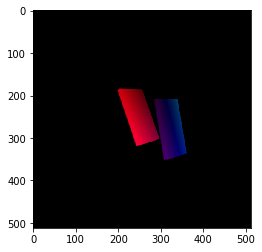

In [15]:
from tools.tools import load_blender_flow_exr
from tools.vis_tools import flow_to_vis

flow_path = "/home/kevin/Documents/master-thesis/datasets/dining_room/train/clip13/flow/flow0049.exr"
flow = load_blender_flow_exr(flow_path, [512, 512], False)

flow_vis = flow_to_vis(flow)

plt.imshow(flow_vis)

print(flow[:,:,0].min(), flow[:,:,1].min())

In [6]:

flow = exr2flow_other(flow_path, 512, 512)
hsv = flow_to_hsv(flow)

plt.imshow(hsv[0])

NameError: name 'flow_to_hsv' is not defined